#Assignment 1: Logistic Regression

## Dataset load & Plot

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

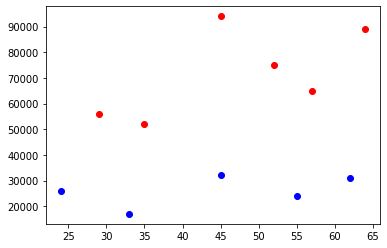

In [ ]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

# Problem 1-1. Logistic regression model using sklearn packages.

Train your data using LogisticRegression classes from skikit-learn library.


In [51]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(fit_intercept=False, random_state=0)
    model = model.fit(X, y)
    w = model.coef_[0]                   # w: coefficient of the model to input features,
    b = model.intercept_ - 1             # b: bias of the model
    return w, b

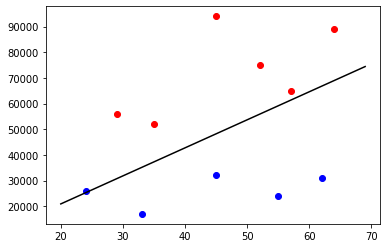

In [52]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]
    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. Implement Logistic Regression Model

Implement Logistic Regression without using scikit-learn libraries.


In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def binary_cross_entropy_loss(y_pred, target):
    delta = 1e-7
    y = sigmoid(y_pred);
    return (-np.sum(target * np.log(y + delta) + (1 - target) * np.log(1 - y)+ delta)).mean(None)
  
    #return np.mean(pow((y_pred - target), 2))

def learn_and_return_weights_numpy(X, Y, lr=.01, iter=100000):
    W = np.zeros(X.shape[1])
    b = 0
    print(X)
    print(W)
    for i in range(10000):
      z = np.dot(X, W) + b
      y_pred = sigmoid(z)
      cost = binary_cross_entropy_loss(y_pred, Y)
      dW = np.dot((y_pred - Y).T, X) / X.shape[0]
      db = np.mean(y_pred - Y)

      W -= dW * lr
      b -= db * lr 
    
    # YOUR CODE COMES HERE
    # w: coefficient of the model to input features,
    # b: bias of the model
    return W, b

[[2.9e+01 5.6e+04]
 [6.4e+01 8.9e+04]
 [3.3e+01 1.7e+04]
 [4.5e+01 9.4e+04]
 [2.4e+01 2.6e+04]
 [5.5e+01 2.4e+04]
 [3.5e+01 5.2e+04]
 [5.7e+01 6.5e+04]
 [4.5e+01 3.2e+04]
 [5.2e+01 7.5e+04]
 [6.2e+01 3.1e+04]]
[0. 0.]


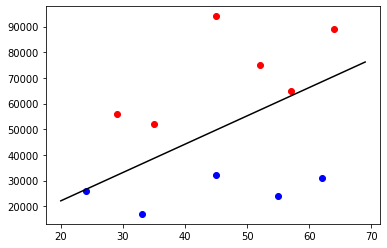

In [ ]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)